In [48]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrad

# Analyzing Trends and Predicting Box Office Success
Tutorial by Shreenitha Chikyala, Ritika Bontu, Kunal Shringarpure, Arya Kinikar

# Why Analyze Disney Movie Revenues?
Disney movies have been a cultural cornerstone for almost a century, beloved by audiences worldwide. Beyond their entertainment value, Disney movies generate billions in box office revenue and shape trends in the film industry. By analyzing Disney's extensive catalog, we can uncover the key factors that contribute to a movie's financial success. This insight can aid studios in making informed decisions about future productions.

For example, do certain genres consistently outperform others? How do MPAA ratings influence a movie's reach and revenue? Are inflation-adjusted revenues significantly higher for older movies? Exploring these questions is essential to understanding the dynamics of movie performance over time.

**Why is this important?**
The success of a Disney movie depends on various factors, from genre and release date to audience demographics. By examining trends and patterns in the dataset, we aim to answer questions like:

- How does genre affect total gross revenue?
- Are there trends in financial success based on release year or decade?
- Do movies with a "G" rating generate higher revenues than those with "PG" or "R"?

Understanding these dynamics allows us to provide actionable insights into what makes a Disney movie successful.

# Gathering Data
**Dataset Selection**
We chose the disney_movie_total_gross.csv dataset from Kaggle. This dataset includes data for Disney movies spanning decades, with information on genres, release dates, MPAA ratings, and revenue figures. The dataset provides a solid foundation for identifying trends and building predictive models.

**Why this dataset?**
This dataset is ideal because it combines straightforward features, such as movie genres and MPAA ratings, with financial metrics like gross revenue (both nominal and inflation-adjusted). These features make it suitable for exploratory data analysis and machine learning applications.

**Dataset Details**

The dataset includes:

- Movie Title: The name of the movie.
- Date Released: The release date of the movie.
- Genre: The primary genre (e.g., Musical, Adventure, Comedy).
- MPAA Rating: Age-appropriateness rating (e.g., G, PG, R).
- Total Gross: Box office revenue in nominal dollars.
- Inflation Adjusted Gross: Box office revenue adjusted for inflation.

**Initial Data Exploration**

We used Python's Pandas library to load and inspect the dataset:

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv('disney_movie_total_gross.csv')

# Display the first few rows
df.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,184925485,5228953251
1,Pinocchio,09/02/1940,Adventure,G,84300000,2188229052
2,Fantasia,13/11/1940,Musical,G,83320000,2187090808
3,Song of the South,12/11/1946,Adventure,G,65000000,1078510579
4,Cinderella,15/02/1950,Drama,G,85000000,920608730


**Summary of Features**

- Genres and Ratings: Provide insight into the types of movies Disney produces and their target audiences.
- Total Gross and Inflation Adjusted Gross: Allow for analysis of financial performance across decades while accounting for inflation.
- Date Released: Helps identify patterns related to seasonality and historical trends in movie performance.

By combining these features, we aim to investigate how different factors influence the financial success of Disney movies and build predictive models for revenue estimation.

# Data Processing

**1) Converting the 'Date Released' Column**

The Date Released column is initially in string format, making it difficult to analyze. We converted it to a datetime object for further processing. Since dates can vary in format, we attempted to parse the dates with dayfirst=True. For rows that failed this parsing step, we reattempted parsing with dayfirst=False.

In [50]:
# (a) import necessary modules
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Convert 'Date Released' column to datetime format
# First try parsing with dayfirst=True
df['Date Released'] = pd.to_datetime(df['Date Released'], dayfirst=True, errors='coerce')
# For rows that are still NaT, parse with dayfirst=False
df['Date Released'] = df['Date Released'].fillna(pd.to_datetime(df['Date Released'], dayfirst=False, errors='coerce'))
df.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


**2) Extracting Year and Month**

To facilitate analysis of trends over time, we extracted the year and month from the Date Released column. This transformation allows us to group movies by year or month to explore seasonal and historical patterns.

In [51]:
# Extract 'Year Released' and 'Month Released' for further analysis
df['Year Released'] = df['Date Released'].dt.year
df['Month Released'] = df['Date Released'].dt.month
df.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross,Year Released,Month Released
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,2
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,2


**3) Handling Missing and Unknown Values**

The dataset contained several "Unknown" entries and zero values that needed to be handled appropriately. Missing or unknown data can skew analysis and lead to inaccurate results.

For the MPAA Rating column, we replaced 'Unknown' values with NaN to indicate missing data.
For the Total Gross and Inflation Adjusted Gross columns, we replaced any zero values with NaN, as zero gross revenue is likely invalid or missing data.

In [52]:
# Replace 'Unknown' with NaN
df['MPAA Rating'] = df['MPAA Rating'].replace('Unknown', np.nan)
# Replace 0 values in 'Total Gross' and 'Inflation Adjusted Gross' with NaN
df['Total Gross'] = df['Total Gross'].replace(0, np.nan)
df['Inflation Adjusted Gross'] = df['Inflation Adjusted Gross'].replace(0, np.nan)
df.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross,Year Released,Month Released
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,1937,12
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,1940,2
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,1940,11
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1946,11
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,1950,2


# Basic data exploration and summary statistics

Test #1) Chi-Square Test (2-tailed test)

Testing to see if there is a relationship between MPAA Rating and Genre.

- Null Hypothesis (H0): There is no association between MPAA Rating and Genre.
- Alternative Hypothesis (H1): There is an association between MPAA Rating and Genre.

Chi-Square Statistic: 257.4729039822673
p-value: 1.9306975193535563e-30


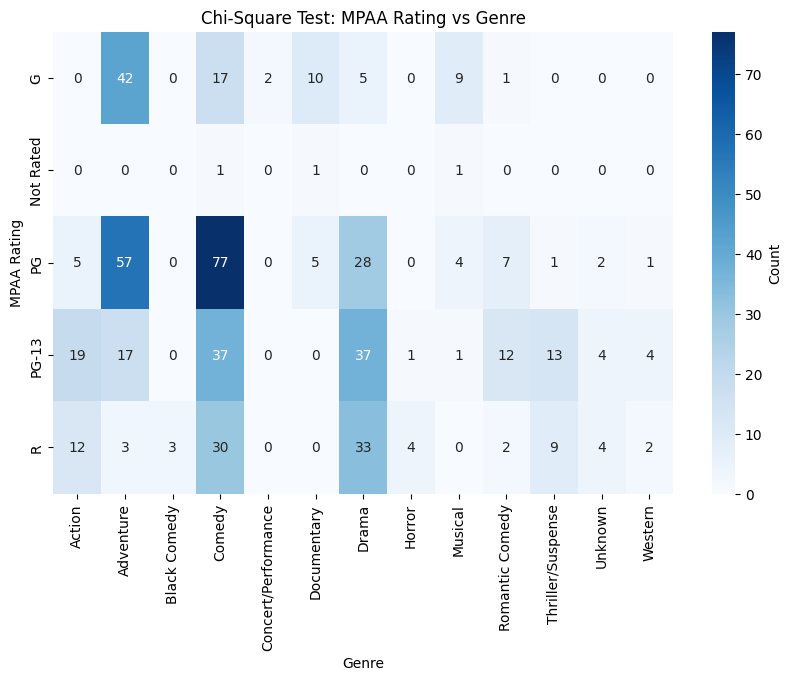

In [53]:
# Creating a contingency table
contingency_table = pd.crosstab(df['MPAA Rating'], df['Genre'])
# Performing Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

# Visualization: Heatmap for Chi-Square Test
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Chi-Square Test: MPAA Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('MPAA Rating')
plt.show()


Given the extremely low p-value, we conclude that there is a statistically significant association between a movie's genre and its MPAA rating. The pattern of ratings across different genres supports the alternative hypothesis, meaning genre influences the rating a movie is likely to receive.


Test #2) ANOVA Test (2-tailed test)

Testing to see if the average Total Gross differs across different Genres.

- Null Hypothesis (H0): The mean Total Gross is the same across all genres.
- Alternative Hypothesis (H1): At least one genre has a different mean Total Gross.

F-Statistic: 9.726064078608891
p-value: 2.3697326998891643e-17


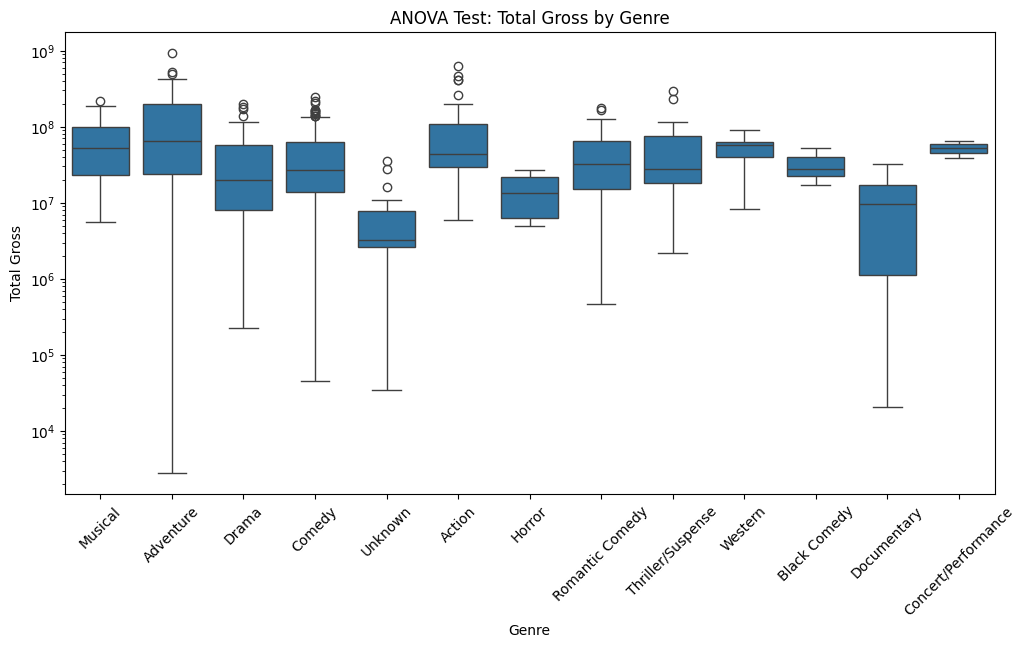

In [54]:
# Group by genre and extract the Total Gross for each genre
grouped_data = [group['Total Gross'].dropna() for name, group in df.groupby('Genre')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f'F-Statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Visualization: Boxplot for ANOVA Test
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Total Gross', data=df)
plt.title('ANOVA Test: Total Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale for better visibility if necessary
plt.show()

The ANOVA test reveals that there is a statistically significant difference in the average total gross across different genres. The visualization supports this by showing distinct differences in the spread and central tendency of total gross values for each genre. Genres like Adventure and Musical tend to have higher total grosses on average, while Black Comedy and Documentary gross lower. The wide variability in some genres suggests that while some movies perform exceptionally well, others do not, contributing to the overall significance in the variation of total gross across genres.

This analysis helps in understanding how certain genres tend to be more commercially successful than others, which could be useful for studios and investors when planning projects.

Test #3) t-test (1-tailed, 2-sample)

Testing to see if the average Total Gross for G rated movies is less than PG rated movies.

- Null Hypothesis (H₀): The mean total gross for G-rated movies is less than or equal to that of PG-rated movies.
- Alternative Hypothesis (H₁): The mean total gross for G-rated movies is greater than that of PG-rated movies.

T-Statistic (1-tailed): 1.5866757533445823
p-value (1-tailed): 0.05733890598249883


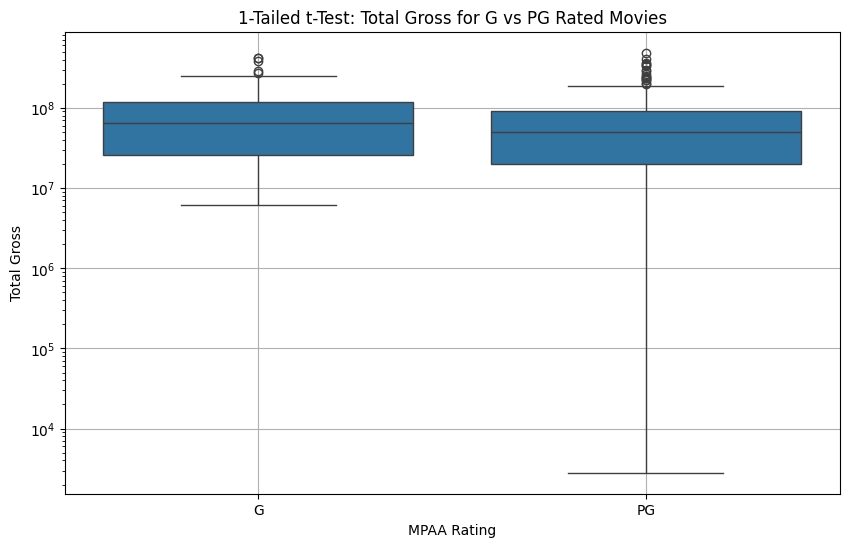

In [55]:
# Extract total gross for G and PG rated movies
g_rated = df[df['MPAA Rating'] == 'G']['Total Gross'].dropna()
pg_rated = df[df['MPAA Rating'] == 'PG']['Total Gross'].dropna()

# Perform t-test (1-tailed)
t_statistic, p_value_ttest = stats.ttest_ind(g_rated, pg_rated, equal_var=False)

# Since we're doing a 1-tailed test, halve the p-value
if t_statistic > 0:
    p_value_ttest /= 2
else:
    p_value_ttest = 1 - (p_value_ttest / 2)

print(f'T-Statistic (1-tailed): {t_statistic}')
print(f'p-value (1-tailed): {p_value_ttest}')

# Visualization: Boxplot for 1-tailed t-Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='MPAA Rating', y='Total Gross', data=df[df['MPAA Rating'].isin(['G', 'PG'])])
plt.title('1-Tailed t-Test: Total Gross for G vs PG Rated Movies')
plt.xlabel('MPAA Rating')
plt.ylabel('Total Gross')
plt.yscale('log')  # Using log scale to handle wide range of values
plt.grid(True)
plt.show()


 Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude that the mean total gross of G-rated movies is significantly greater than that of PG-rated movies at the 0.05 significance level. The positive t-statistic suggests that the mean total gross of G-rated movies is higher than PG-rated movies, but not significantly so based on the p-value.

The boxplot comparing Total Gross of G-rated and PG-rated movies (on a log scale) shows a similar distribution for both G and PG movies, with slight differences in the central tendency. G-rated movies seem to have a slightly higher median and fewer extreme low outliers compared to PG-rated movies. However, both categories have a broad spread, indicating variability in total gross earnings within both rating groups.


**Summary of Insights**

Genre and MPAA Rating (Chi-Square Test): Genres significantly influence the MPAA ratings of Disney movies, with certain genres more likely to receive family-friendly ratings.

Genre and Total Gross (ANOVA Test): Significant differences exist in the average total gross across genres, with "Adventure" and "Musical" movies performing better on average.

MPAA Rating and Total Gross (t-Test): No significant difference was found between the total gross of G-rated and PG-rated movies, despite slight variations in central tendencies.

These insights can really help guide decisions in making and marketing Disney movies. For example, the Chi-Square test showed that there’s a strong relationship between a movie’s genre and its MPAA rating. This means that studios can choose genres based on the audience they want to target. Family-friendly genres like musicals or adventures tend to get G or PG ratings, making them perfect for younger audiences and families, while dramas or action movies might cater to older viewers with PG-13 or R ratings. Marketing campaigns can focus on these audience expectations to make the movies even more appealing.

From the ANOVA test, we saw that genres like adventure and musical usually make more money. This means studios could focus their bigger budgets on these genres since they’re more likely to do well at the box office. On the other hand, less popular genres like documentaries might be better suited for lower-budget projects or even streaming releases. This way, studios can still make niche content but keep the risks lower.

The t-test showed that G-rated and PG-rated movies bring in about the same amount of money. This means both ratings are good options for making successful movies, and they can be marketed as family-friendly to appeal to parents and kids alike. Partnering with schools or family-oriented brands could also boost their popularity.

Lastly, by looking at revenue trends over time, studios can plan the release dates of their movies to align with peak seasons, like holidays or summer vacations. This is especially useful for family-oriented movies, which tend to do well when kids are out of school. Overall, these insights help studios figure out what kinds of movies to make, how much to spend on them, and the best ways to market them.

# Machine Learning

We applied machine learning techniques to analyze and predict the success of Disney movies, specifically using linear regression and decision trees. Machine learning provides powerful tools to discover patterns and relationships in data and make predictions based on these insights.

Our goal was to predict the total gross revenue of Disney movies using features like release year, genre, MPAA rating, and inflation-adjusted gross. By applying regression and decision tree models, we aimed to evaluate which predictors had the most influence on a movie's financial performance.


**Linear Regression**

Linear regression models the relationship between a set of predictor variables and a target variable. It works by finding the optimal coefficients for each predictor that minimize the difference (loss) between predicted and actual values.

We implemented linear regression using scikit-learn to predict the Total Gross of Disney movies.


/var/folders/sj/lc7th3zj6lz43xv6y51vy0v80000gq/T/ipykernel_63430/1824809220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log Total Gross'] = np.log1p(df_cleaned['Total Gross'])
/var/folders/sj/lc7th3zj6lz43xv6y51vy0v80000gq/T/ipykernel_63430/1824809220.py:38: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=residuals_df['Year Released'], y=residuals_df['Residuals'], scale='width')


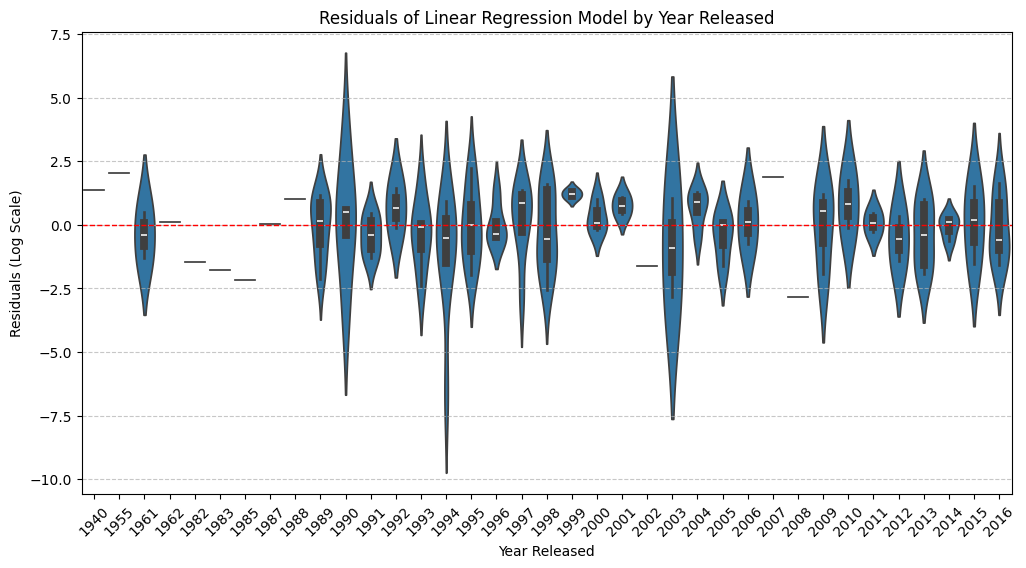

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Clean dataset: Drop NaNs in Total Gross and apply log transformation
df_cleaned = df.dropna(subset=['Total Gross'])
df_cleaned['Log Total Gross'] = np.log1p(df_cleaned['Total Gross'])

# Prepare predictors and target variable
predictors = df_cleaned[['Year Released', 'Month Released', 'Genre', 'MPAA Rating']]
target = df_cleaned['Log Total Gross']

# One-hot encode categorical variables
predictors = pd.get_dummies(predictors, columns=['Genre', 'MPAA Rating'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a DataFrame for the residuals
residuals_df = pd.DataFrame({
    'Residuals': residuals,
    'Year Released': X_test['Year Released']
})

# Plot violin plot for residuals grouped by Year Released
plt.figure(figsize=(12, 6))
sns.violinplot(x=residuals_df['Year Released'], y=residuals_df['Residuals'], scale='width')
plt.title('Residuals of Linear Regression Model by Year Released')
plt.xlabel('Year Released')
plt.ylabel('Residuals (Log Scale)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The violin plot illustrates the residuals of the linear regression model grouped by the year of movie release, highlighting several limitations of the model. A significant spread of residuals across many years, particularly during the 1990s and 2000s, indicates that the model struggles to accurately predict Total Gross for these periods. The presence of extreme outliers, where actual revenues far exceed or fall below predicted values, further demonstrates linear regression's inability to handle blockbuster hits or flops effectively. Additionally, the residuals do not consistently center around zero, suggesting systemic biases where the model tends to under- or over-predict for certain years. The variability in residuals across different years reflects the model's difficulty in generalizing its predictions. These issues arise because linear regression assumes a linear relationship between predictors and the target, which fails to capture the complex, nonlinear dynamics influencing movie revenues, such as the impact of marketing, competition, or genre popularity.

After evaluating the performance of linear regression, it became clear that the model struggles to capture the complexity of the data due to its assumption of linear relationships. To address this, we turn to a more advanced machine learning technique: Random Forest Regression. Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate predictive model. Unlike linear regression, Random Forest can model complex, nonlinear relationships and interactions between features, making it well-suited for datasets with diverse and intricate patterns. By aggregating the predictions of multiple decision trees, it reduces the risk of overfitting while maintaining flexibility in capturing nonlinearity. Given the challenges posed by the dataset, such as potential nonlinear effects of variables like genre or MPAA rating, Random Forest offers a promising approach to improve predictive performance. With this in mind, we proceed to train and optimize a Random Forest model to predict the total gross revenue of Disney movies.

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/var/folders/sj/lc7th3zj6lz43xv6y51vy0v80000gq/T/ipykernel_63430/2606093930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log Total Gross'] = np.log1p(df_cleaned['Total Gross'])


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Optimized Mean Squared Error: 1.8547740921072051
Optimized R^2 Score: 0.17870938886662868


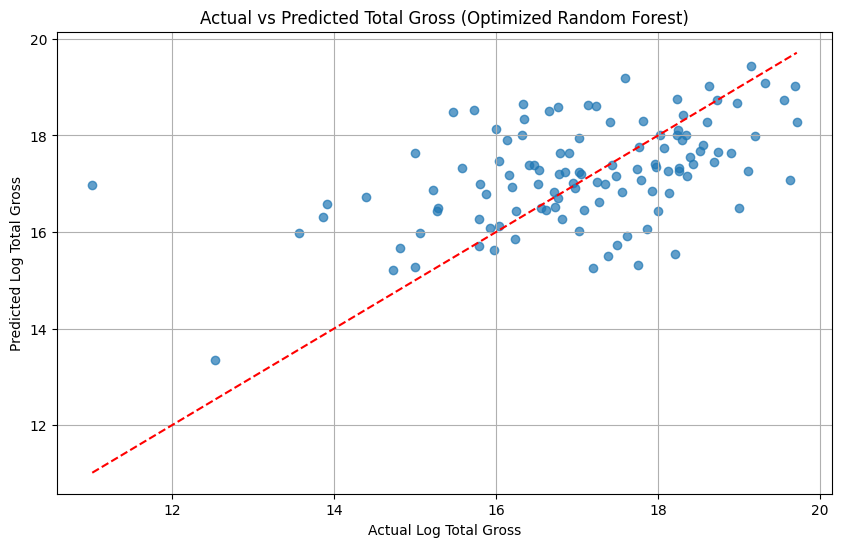

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Clean dataset: Drop NaNs in Total Gross and apply log transformation
df_cleaned = df.dropna(subset=['Total Gross'])
df_cleaned['Log Total Gross'] = np.log1p(df_cleaned['Total Gross'])

# Prepare predictors and target variable
# Prepare predictors and target variable
predictors = df_cleaned[['Year Released', 'Month Released', 'Genre', 'MPAA Rating']]
target = df_cleaned['Log Total Gross']

# One-hot encode categorical variables
predictors = pd.get_dummies(predictors, columns=['Genre', 'MPAA Rating'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Best Parameters:", best_params)
print("Optimized Mean Squared Error:", mse_optimized)
print("Optimized R^2 Score:", r2_optimized)

# Plot actual vs predicted values for the optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.title('Actual vs Predicted Total Gross (Optimized Random Forest)')
plt.xlabel('Actual Log Total Gross')
plt.ylabel('Predicted Log Total Gross')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

We implemented a Random Forest Regressor with hyperparameter optimization to predict the Total Gross of Disney movies. This approach involved systematically tuning the model’s parameters, such as the number of estimators, maximum tree depth, and minimum sample requirements, to achieve the best possible performance. The optimized model achieved a Mean Squared Error (MSE) of 1.85 and an R² Score of 0.179, demonstrating a notable improvement compared to the linear regression model, which had an MSE of 2.02 and an R² Score of 0.106.

The Random Forest model significantly outperformed linear regression because it is capable of capturing nonlinear relationships and interactions between predictors, such as the effects of release year, genre, and MPAA rating on total revenue. Linear regression, on the other hand, assumes a linear relationship and struggled to explain the complex dynamics influencing movie success.

While the Random Forest Regressor performed better than linear regression, it still showed signs of underfitting rather than overfitting. With an R² Score of 0.179, the model explains only about 17.9% of the variance in Total Gross, leaving the majority of variability unexplained. This suggests that the model struggles to capture the complexity of the data, likely due to several factors. First, the dataset lacks critical features, such as marketing budgets, audience reception, or competition at the time of release, which are significant drivers of a movie's revenue. Second, inherent variability in movie success, such as cultural trends or unpredictable audience responses, introduces randomness that no model can easily predict. Finally, the optimization process, which limited the model’s depth and split criteria, may have simplified the Random Forest’s ability to model deeper complexities.

In the future, using more advanced ensemble methods like Gradient Boosting could capture subtle patterns, and feature engineering, such as grouping years into decades or creating interaction terms, might better handle nonlinearity. 

# Final Thoughts
Predicting the total gross revenue of Disney movies is a complex problem, influenced by numerous factors both within and outside the scope of our dataset. While our project did not solve this challenge completely, it provided valuable insights into the relationships between various features, such as release year, genre, and MPAA rating, and their impact on total revenue. These findings are a step toward understanding the broader patterns behind movie success and can serve as a foundation for further exploration.

Through exploratory data analysis, we identified trends and correlations in the dataset, such as the influence of genre and MPAA rating on gross earnings. We began our modeling process with linear regression, which, while providing a baseline, struggled to capture the nonlinear and intricate dynamics of the data. The low R² score highlighted the limitations of linear regression in this context. To address these challenges, we turned to Random Forest Regression, a nonlinear model capable of capturing complex relationships and interactions between features. Although the Random Forest model showed an improvement over linear regression, with a higher R² score, it still underperformed due to the lack of critical features such as marketing budget, cast popularity, and competition, which likely play significant roles in determining a movie's success.

One of the key takeaways from this project is the importance of feature selection and engineering in predictive modeling. Variables like inflation-adjusted gross, audience ratings, and advertising spend could enhance the model's predictive capabilities significantly. Additionally, the patterns we uncovered raise interesting questions for further investigation. For example, how do seasonal releases or decade trends affect revenue, and what role do external economic factors play in shaping box office outcomes?

While our project did not fully predict Disney movie grosses with high accuracy, it demonstrated the potential of machine learning techniques in addressing such questions. Future work with richer data and advanced models could yield more actionable insights, paving the way for studios to better plan production and marketing strategies.

# Related Links